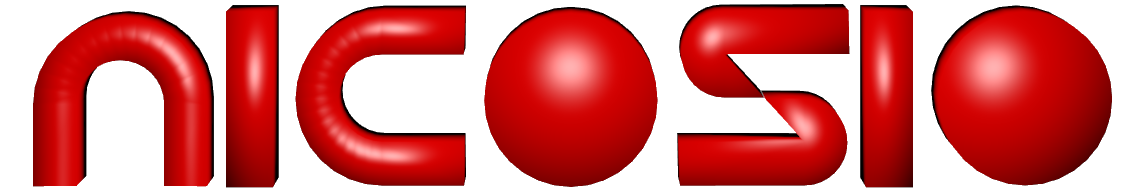
Join

In [68]:
# importamos las bibliotecas
import pandas as pd
import numpy as np

Para leer un archivo csv y dejarlo en formato dataframe de pandas usamos pd.read_csv()

In [69]:
# Leemos los datasets
user_usage = pd.read_csv('user_usage.csv')
user_devices = pd.read_csv('user_device.csv')


In [70]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [71]:
user_devices.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,iPhone7_2,2
1,22783,29628,android,6.0,Nexus_5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,iPhone7_2,3
4,22786,28239,android,6.0,ONE_E1003,1


Para eliminar una columna hacemos uso de drop

In [72]:
# Por limpieza en el ejemplo eliminamos la columna user_id
user_devices.drop('user_id',axis='columns', inplace=True)
user_devices.head()

,use_id,platform,platform_version,device,use_type_id
0,22782,ios,10.2,iPhone7_2,2
1,22783,android,6.0,Nexus_5,3
2,22784,android,5.1,SM-G903F,1
3,22785,ios,10.2,iPhone7_2,3
4,22786,android,6.0,ONE_E1003,1


# Inner Join
Cuando combinamos los datasets, el dataset que invoca es la tabla izquierda, el pasado como parametro es la tabla derecha
El inner join solo regresa filas que tienen valores iguales en ambas tablas<BR>
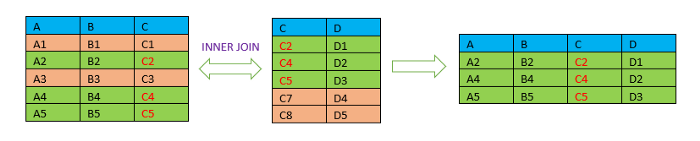

In [73]:
# izquierda es user_usage
# unimos con las columnas platform y use_id de user_device, es decir podemos seleccionar solo las columnas 
# relevantes para nosotros
# La union es con los valores de use_id que comparten ambos datasets, on indica la columna en comun, puede ser una lista

# probar adicionando platform_version a la lista
innerD = user_usage.merge( user_devices[['platform','use_id']],  on='use_id', how='inner')
innerD.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
0,21.97,4.82,1557.33,22787,android
1,1710.08,136.88,7267.55,22788,android
2,1710.08,136.88,7267.55,22789,android
3,94.46,35.17,519.12,22790,android
4,71.59,79.26,1557.33,22792,android


In [74]:
innerD.shape
# Aqui podemos ver que solo 159 usuarios se encuentran en ambas tablas

(159, 5)

# Left y Right join
En el left join se retornaran todas las filas de la tabla left incluidas las filas que concuerdan con la tabla rigth<BR>
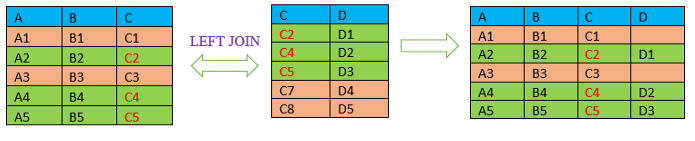

En el right join se retornaran todas las filas de la derecha incluyendo aques que concuerdan con la izquierda<BR>
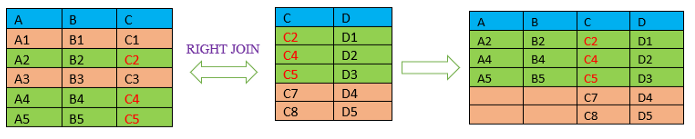
<BR>
Pandas coloca NaN en las celdas donde no se concuerda

In [75]:
leftD = user_usage.merge( user_devices[['platform', 'use_id']],  on='use_id', how='left')
leftD.head()


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
0,21.97,4.82,1557.33,22787,android
1,1710.08,136.88,7267.55,22788,android
2,1710.08,136.88,7267.55,22789,android
3,94.46,35.17,519.12,22790,android
4,71.59,79.26,1557.33,22792,android


In [76]:
# Tail nos permite observar las ultimas filas del dataframe
leftD.tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
235,260.66,68.44,896.96,25008,NaN
236,97.12,36.50,2815.00,25040,NaN
237,355.93,12.37,6828.09,25046,NaN
238,632.06,120.46,1453.16,25058,NaN
239,488.70,906.92,3089.85,25220,NaN


In [77]:
rightD = user_usage.merge( user_devices[['platform', 'use_id']],  on='use_id', how='right')
rightD.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
0,NaN,NaN,NaN,22782,ios
1,NaN,NaN,NaN,22783,android
2,NaN,NaN,NaN,22784,android
3,NaN,NaN,NaN,22785,ios
4,NaN,NaN,NaN,22786,android


In [78]:
rightD.tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
267,344.53,20.53,519.12,23049,android
268,NaN,NaN,NaN,23050,ios
269,NaN,NaN,NaN,23051,ios
270,NaN,NaN,NaN,23052,ios
271,42.75,46.83,5191.12,23053,android


# Outerjoin
Regresa la interseccion y todas las demas filas de ambas tablas<BR>
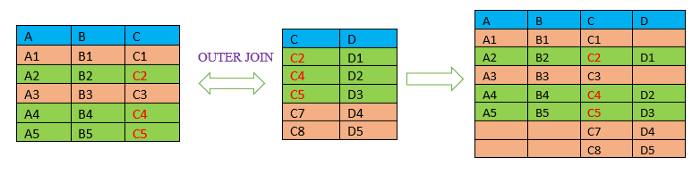

In [79]:
outerD = user_usage.merge( user_devices[['platform', 'use_id']],  on='use_id', how='outer')
outerD.head()


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
0,21.97,4.82,1557.33,22787,android
1,1710.08,136.88,7267.55,22788,android
2,1710.08,136.88,7267.55,22789,android
3,94.46,35.17,519.12,22790,android
4,71.59,79.26,1557.33,22792,android


In [80]:
outerD.tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform
348,NaN,NaN,NaN,23047,ios
349,NaN,NaN,NaN,23048,android
350,NaN,NaN,NaN,23050,ios
351,NaN,NaN,NaN,23051,ios
352,NaN,NaN,NaN,23052,ios


# Sufijos

In [81]:
# Supongamos que no tenemos columnas con nombres identicos, se puede, en ese caso copiar una columna al otro dataset
# y de esta forma hacer un join. Hay que seleccionar adecuadamente la columna a copiar
# Para poder saber facilmente que columna contribuye al dato usamos los sufijos
user_devices.head()



,use_id,platform,platform_version,device,use_type_id
0,22782,ios,10.2,iPhone7_2,2
1,22783,android,6.0,Nexus_5,3
2,22784,android,5.1,SM-G903F,1
3,22785,ios,10.2,iPhone7_2,3
4,22786,android,6.0,ONE_E1003,1


In [82]:
user_devices['monthly_mb'] = user_usage['monthly_mb']
user_devices.head()

,use_id,platform,platform_version,device,use_type_id,monthly_mb
0,22782,ios,10.2,iPhone7_2,2,1557.33
1,22783,android,6.0,Nexus_5,3,7267.55
2,22784,android,5.1,SM-G903F,1,7267.55
3,22785,ios,10.2,iPhone7_2,3,519.12
4,22786,android,6.0,ONE_E1003,1,1557.33


In [83]:
# Aqui hacemos un join 
resultado = user_devices.merge(user_usage, on='use_id')

resultado.head()

# Vemos que se crean dos columnas nuevas. La que tiene _x es para la tabla left
# la que tiene _y es para la tabla right

,use_id,platform,platform_version,device,use_type_id,monthly_mb_x,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb_y
0,22787,android,4.3,GT-I9505,1,1557.33,21.97,4.82,1557.33
1,22788,android,6.0,SM-G930F,1,519.12,1710.08,136.88,7267.55
2,22789,android,6.0,SM-G930F,1,519.12,1710.08,136.88,7267.55
3,22790,android,5.1,D2303,1,3114.67,94.46,35.17,519.12
4,22792,android,5.1,SM-G361F,1,3114.67,71.59,79.26,1557.33


In [84]:
# Comparemos cuando lo hacemos con sufijos
resultado = user_devices.merge( user_usage, on='use_id',  suffixes=('_device', '_usage'))

resultado.head()

# Los sufijos nos permiten identificar facilmente de donde provienen los datos

,use_id,platform,platform_version,device,use_type_id,monthly_mb_device,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb_usage
0,22787,android,4.3,GT-I9505,1,1557.33,21.97,4.82,1557.33
1,22788,android,6.0,SM-G930F,1,519.12,1710.08,136.88,7267.55
2,22789,android,6.0,SM-G930F,1,519.12,1710.08,136.88,7267.55
3,22790,android,5.1,D2303,1,3114.67,94.46,35.17,519.12
4,22792,android,5.1,SM-G361F,1,3114.67,71.59,79.26,1557.33


# left_on, right_on
A veces sucede que tenemos la columna en comun, pero tienen nombre diferente en cada tabla. <BR>
Para estos casos podemos usar left_on o right_on, con estos parametros indicamos el nombre de la columna a usar para la tabla izquierda y derecha.

In [85]:
#Solo por razones de ejemplo cambiamos el nombre a la columna
user_usage.rename(columns={'use_id': 'user'}, inplace=True)

# Eliminamos la columna copiada para hacerlo similar a los ejercicios iniciales
user_devices.drop('monthly_mb',axis='columns', inplace=True)

In [86]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,user
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [87]:
leftOnD=user_usage.merge( user_devices, left_on='user',  right_on='use_id')
leftOnD.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,user,use_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,22787,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,22788,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,22789,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,22790,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,22792,android,5.1,SM-G361F,1


# Merge on index

In [88]:
# Llega a suceder que la columna puede actuar como indice, en ese caso tambien se puede hacer el merge

# Regresamos el nombre original
user_usage.rename(columns={'user':'use_id'}, inplace=True)

# Solo como ejemplo colocamos las columnas como indices
user_usage.set_index('use_id', inplace=True)
user_devices.set_index('use_id', inplace=True)

In [89]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
use_id,,,
22787,21.97,4.82,1557.33
22788,1710.08,136.88,7267.55
22789,1710.08,136.88,7267.55
22790,94.46,35.17,519.12
22792,71.59,79.26,1557.33


In [90]:
user_devices.head()

,platform,platform_version,device,use_type_id
use_id,,,,
22782,ios,10.2,iPhone7_2,2
22783,android,6.0,Nexus_5,3
22784,android,5.1,SM-G903F,1
22785,ios,10.2,iPhone7_2,3
22786,android,6.0,ONE_E1003,1


In [91]:
# Hacemos el merge
mergeI=user_usage.merge(user_devices,  on='use_id', how='outer')
mergeI.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform,platform_version,device,use_type_id
use_id,,,,,,,
22787,21.97,4.82,1557.33,android,4.3,GT-I9505,1.0
22788,1710.08,136.88,7267.55,android,6.0,SM-G930F,1.0
22789,1710.08,136.88,7267.55,android,6.0,SM-G930F,1.0
22790,94.46,35.17,519.12,android,5.1,D2303,1.0
22792,71.59,79.26,1557.33,android,5.1,SM-G361F,1.0


In [92]:
# Si se tienen diferentes nombre hay que adicionar los parametros left_index=True
# y right_index=True para que funcione

# Solo para el ejemplo, cambiamoslos nombres de las columnas de indices
user_usage.index.names = ['index_1']
user_devices.index.names = ['index_2']

# Merge on index
mergeID=user_usage.merge( user_devices, left_index=True,  right_index=True)

# Si notamos una duplicacion de valores que podemos eliminar la columna repetida del indice si lo necesitamos

# En versiones anteriores se usaba de esta forma
"""
mergeID=user_usage.merge( user_devices, left_on='index_1', left_index=True, 
                         right_on='index_2', right_index=True)
"""

"\nmergeID=user_usage.merge( user_devices, left_on='index_1', left_index=True, \n                         right_on='index_2', right_index=True)\n"

In [93]:
mergeID.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform,platform_version,device,use_type_id
22787,21.97,4.82,1557.33,android,4.3,GT-I9505,1
22788,1710.08,136.88,7267.55,android,6.0,SM-G930F,1
22789,1710.08,136.88,7267.55,android,6.0,SM-G930F,1
22790,94.46,35.17,519.12,android,5.1,D2303,1
22792,71.59,79.26,1557.33,android,5.1,SM-G361F,1


In [94]:
# Leemos los datasets nuevamente para facilitarnos los siguientes ejemplos
user_usage = pd.read_csv('user_usage.csv')
user_devices = pd.read_csv('user_device.csv')

user_devices.drop('user_id',axis='columns', inplace=True)

# Semi join
Son utiles cuando deseamos un subconjunto de los datos, basados en observaciones de otras tablas.<BR>
El resultado tiene estas caractetisticas:<BR>
1. Regresa la interseccion de las dos tablas<BR>
2. Regresa solo las columnas de left, no de right<BR>
3. No duplicados<BR>
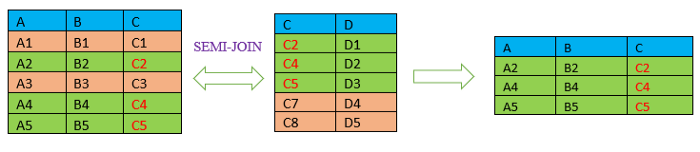

In [95]:
# Primero hacemos un inner join para encontrar los use_ids comunes
comunes=user_usage.merge(user_devices, on='use_id')
comunes.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,android,5.1,SM-G361F,1


In [96]:
# Ahora encontramos  las filas de left que estan en los comunes
subconjunto = user_usage['use_id'].isin(comunes['use_id'])
subconjunto.head()

0    True
1    True
2    True
3    True
4    True
Name: use_id, dtype: bool

In [97]:
# Con el subconjunto, obtenemos los datos
semiJoin=user_usage[subconjunto]
semiJoin.head()

# Vemos que el resultado es similar al inner join, es la misma tabla sin las columnas de la derecha

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


# Anti-join
Regresa la left, excluyendo la interseccion y resgresa solo columnas de la tabla izquierda
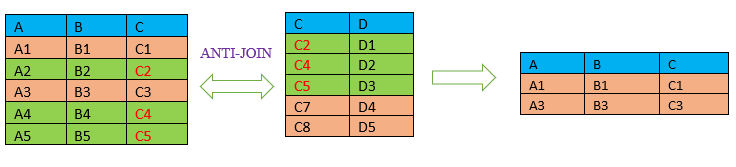

In [98]:
# Hacemos un left join
# indicator con True, crea una columna extra llamada _merge, indica si la fila es el
# resultado de ambas tablas o un solo lado
leftJ= user_usage.merge( user_devices, how='left',   on='use_id', indicator=True)
leftJ.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,platform_version,device,use_type_id,_merge
0,21.97,4.82,1557.33,22787,android,4.3,GT-I9505,1.0,both
1,1710.08,136.88,7267.55,22788,android,6.0,SM-G930F,1.0,both
2,1710.08,136.88,7267.55,22789,android,6.0,SM-G930F,1.0,both
3,94.46,35.17,519.12,22790,android,5.1,D2303,1.0,both
4,71.59,79.26,1557.33,22792,android,5.1,SM-G361F,1.0,both


In [99]:
leftJ.tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,platform_version,device,use_type_id,_merge
235,260.66,68.44,896.96,25008,NaN,NaN,NaN,NaN,left_only
236,97.12,36.50,2815.00,25040,NaN,NaN,NaN,NaN,left_only
237,355.93,12.37,6828.09,25046,NaN,NaN,NaN,NaN,left_only
238,632.06,120.46,1453.16,25058,NaN,NaN,NaN,NaN,left_only
239,488.70,906.92,3089.85,25220,NaN,NaN,NaN,NaN,left_only


In [100]:
# Obtenemos el use_id de aquellos que solo se han creado con la tabla izquierda
soloLeft = leftJ.loc[leftJ['_merge'] == 'left_only', 'use_id']
soloLeft.head()

159    23057
160    23058
161    23059
162    23073
163    23083
Name: use_id, dtype: int64

In [101]:
antiJ=user_usage[user_usage['use_id'].isin(soloLeft)]
antiJ.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
159,501.92,165.52,2112.59,23057
160,60.41,0.80,3114.67,23058
161,60.41,0.80,3114.67,23059
162,46.40,65.90,1557.33,23073
163,38.56,47.65,4025.86,23083


In [102]:
antiJ.shape

(81, 4)

# Concat
Sirve para concatenar dos o mas tablas en un eje en particular, veamos mas ejemplos

In [103]:
# Creamos unos dataframes de ejemplo

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

print(df1,'\n------\n')
print(df2,'\n------\n')
print(df3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3 
------

    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7 
------

      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [104]:
# Hay que tener cuidado de que las dimensiones en el eje que estamos concatenando coincidad para evitar tener problemas 
# Tenemos que pasar la lista de dataframes a concatenar, pueden ser mas de dos
# El eje de default es 0, es decir por filas
concatenados=pd.concat([df1,df3])
print(concatenados)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [105]:
# Se pueden concatenar mas de dos dataframes, hay que notar los indices
concatenados2=pd.concat([df1,df3,df2])
print(concatenados2)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7


In [106]:
# Si deseamos reorganizar los indices
# Con drop=True indicamos que no inserte una columna con los valores numericos del indice
concatenados2.reset_index(inplace=True, drop=True)
print(concatenados2)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A8   B8   C8   D8
5    A9   B9   C9   D9
6   A10  B10  C10  D10
7   A11  B11  C11  D11
8    A4   B4   C4   D4
9    A5   B5   C5   D5
10   A6   B6   C6   D6
11   A7   B7   C7   D7


In [107]:
# Podemos unir por columnas
# Donde no hay datos existentes para poder concatenar se coloca NaN
concatenadosC=pd.concat([df1,df3], axis=1)
print(concatenadosC)

      A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  A11  B11  C11  D11


# Join
Es una forma en la que podemos combinar las columnas de dos dataframes que posiblemente esten indexados de formas diferentes, en uno solo.<BR>
Es similar a merge, pero los valores sobre los que unimos estan en un indice en lugar de en una columna

In [108]:
# Creamos dataframes de ejemplo
izq = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

der = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

print(izq,'\n------\n')
print(der)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2 
------

     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [109]:
jlr=izq.join(der)
print(jlr)

     A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2


In [110]:
jrl=der.join(izq)
print(jrl)

     C   D    A    B
K0  C0  D0   A0   B0
K2  C2  D2   A2   B2
K3  C3  D3  NaN  NaN


In [111]:
innerJlr=izq.join(der, how='inner')
print(innerJlr)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [112]:
outerJlr=izq.join(der, how='outer')
print(outerJlr)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [113]:
ljrl=izq.join(der, how='left')
print(ljrl)

     A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2


In [114]:
ljrr=izq.join(der, how='right')
print(ljrr)

      A    B   C   D
K0   A0   B0  C0  D0
K2   A2   B2  C2  D2
K3  NaN  NaN  C3  D3
